# Data and setup

### Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

### Import visualization libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read in the csv file as a dataframe called 'df'

In [4]:
df = pd.read_csv('911.csv')

### Display top 5 rows 

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Check info() of df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


# Basic Questions

### What are the top 5 zipcodes for 911 calls?

In [13]:
df['zip'].value_counts().head()

zip
19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: count, dtype: int64

### What are the top 5 townships (twp) for 911 calls?

In [14]:
df['twp'].value_counts().head()

twp
LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: count, dtype: int64

### Take a look at the 'title' column, how many unique title are there 

In [18]:
len(df['title'].unique()) ## or df['title'].nunique()

131

# Creating new features

### For example, if the title Column Value is EMS: BACK PAINS/INJURY , the Reason Column value would be EMS.

In [19]:
X = df['title'].iloc[0]

In [21]:
X

'EMS: BACK PAINS/INJURY'

In [20]:
X.split(':')[0]

'EMS'

In [22]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [23]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
289235        EMS
289236       Fire
289237    Traffic
289238    Traffic
289239    Traffic
Name: Reason, Length: 289240, dtype: object

### What is the most common Reason for a 911 call based off of this new column?

In [24]:
df['Reason'].value_counts()

Reason
EMS        144362
Traffic    101889
Fire        42989
Name: count, dtype: int64

### Now use seaborn to create a countplot of 911 calls by Reason.

<Axes: xlabel='Reason', ylabel='count'>

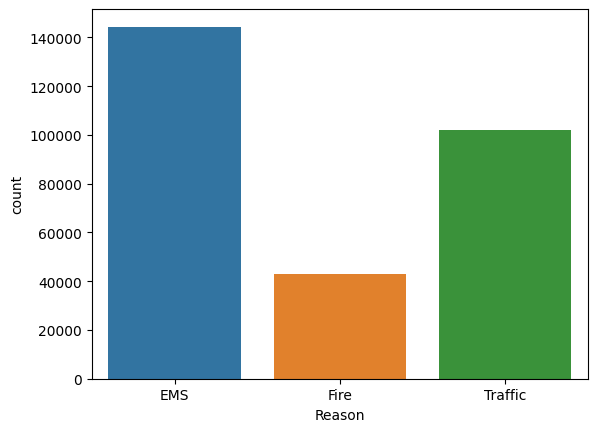

In [25]:
sns.countplot(x='Reason',data=df)

### What is the data type of the object in the timestamp column?

In [29]:
type(df['timeStamp'].iloc[0])

str

### Use 'pd.to_datetime' to convert the column from strings to DateTime objects

In [30]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [31]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
289235   2017-12-30 11:11:36
289236   2017-12-30 11:11:30
289237   2017-12-30 11:15:24
289238   2017-12-30 11:12:03
289239   2017-12-30 11:14:31
Name: timeStamp, Length: 289240, dtype: datetime64[ns]

In [33]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [34]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [35]:
time

Timestamp('2015-12-10 17:10:52')

In [36]:
time.year

2015

In [37]:
time.month

12

In [38]:
time.day_of_week

3

In [39]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [40]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
289235    11
289236    11
289237    11
289238    11
289239    11
Name: Hour, Length: 289240, dtype: int64

In [41]:
df['Month'] = df['timeStamp'].apply(lambda time:time.month)

In [43]:
df['Day_of_week'] = df['timeStamp'].apply(lambda time:time.day_of_week)

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


### Notice how the Day of Week is an Integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week.

In [45]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [47]:
df['Day_of_week'] = df['Day_of_week'].map(dmap)

In [48]:
df['Day_of_week']

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
289235    Sat
289236    Sat
289237    Sat
289238    Sat
289239    Sat
Name: Day_of_week, Length: 289240, dtype: object

### Now use seaborn to create a countplot of the Day of Week column with the hue based off the Reason column.

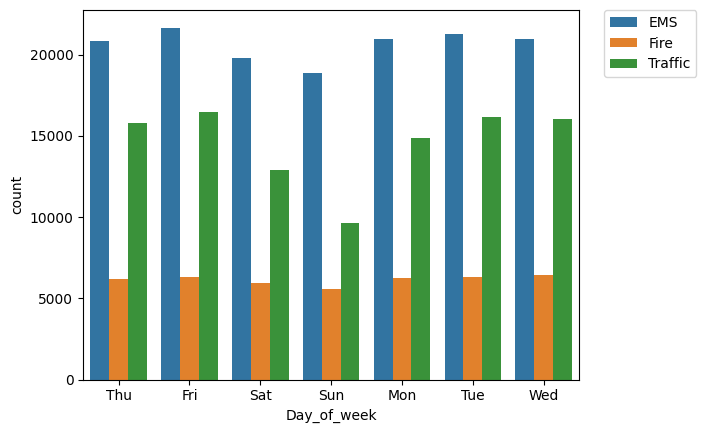

In [50]:
sns.countplot(x='Day_of_week',hue='Reason',data=df)
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

### Do the same for the month

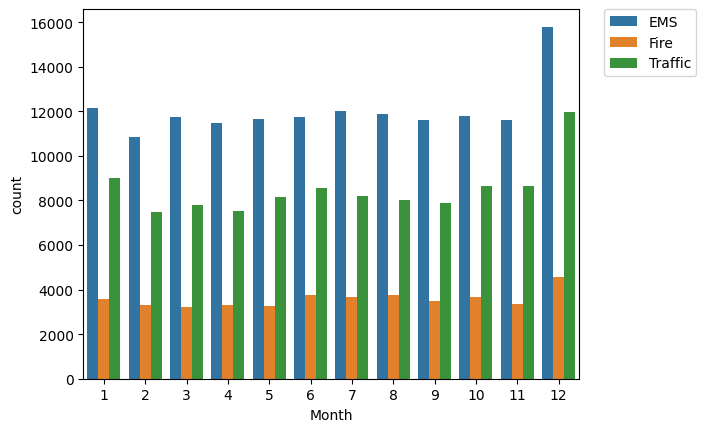

In [52]:
sns.countplot(x='Month',hue='Reason',data=df)
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)